
# Laboratorio 4(Aplicacion de Regularizacion - Regresion Logistica) Grupo 1
 <h3>En este laboratorio se hizo el uso del dataset para aplicar la regularización y sin utilizar regularización a la Regresion Logistica, y como siguiente se presento los resultados de ambas experiencias<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 02/04/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Laboratorio%204)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%204/Regresion%20logistica.ipynb?hl=es)
 <h3>

Para el laboratorio hizo uso del para entrenar el modelo de **Regresion Logistica** aplicado regularizacion y predecir si un paciente tiene alguna enfermedad cardiovascular.

Estos problemas a menudo se deben a la aterosclerosis. Esta afección ocurre cuando la grasa y el colesterol se acumulan en las paredes del vaso sanguíneo (arteria). El enlace al dataset es [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset).

El archivo `cardiovascular_diseases_dv3.csv` contiene un conjunto de datos de entrenamiento de datos si un paciente tiene una enfermedad cardiovascular.

Primero se importo todas las librerias necesarias:

In [34]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80% de los datos
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Carga de datos del dataset

cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [35]:
#cargamos el dataset a un dataframe de pandas
df = pd.read_csv('cardiovascular_diseases_dv3.csv', delimiter=';')

#mostramos el dataset
df

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


## Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


con la siguiente informacion se puede ver lo siguiente, el cual son las caracteristicas del dataset:

**Variables de entrada(X):**

1. **age(Edad).-** Se refiere a la edad del paciente en años.
2. **gender(Genero).-** Hace referencia al genero del paciente, 1 si es hombre y 2 si es mujer.
3. **height(Altura).-** Es la altura del paciente medido en cm.
4. **weight(Peso).-** Es el peso del paciente medido en Kg
5. **ap_hight(Presión arterial sistólica).-** Presión arterial sistólica del paciente.
6. **ap_low(Presión arterial diastólica).-** Presión arterial diastólica del paciente.
7. **cholesterol(Colesterol).-** Nivel de colesterol en el paciente donde. 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal.
8. **glocose(Glucosa).-** Nivel de glucosa del paciente donde. 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal.
9. **smoke(Fuma).-** Indica si el paciente fuma. 1:Si y 2:No.
10. **alcohol(alcohol).-** Indica si el paciente consume alcohol. 1:Si y 2:No.
11. **fhisycal activity(Actividad fisica).-** Indical si el paciente realiza algun tipo de actividad fisica donde. 1:Si y 2:No.

**Variable de salida(y):**

1. **cardiovascular disease(Enfermedad cardiovascular).-** Presencia o ausencia de enfermedad cardiovascular, donde: 1:Si y 2:No.

## Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [37]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset.drop(['CARDIO_DISEASE'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['CARDIO_DISEASE'].values
m_test = len(y_test)

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset.drop(['CARDIO_DISEASE'], axis=1).values
y_train = train_dataset['CARDIO_DISEASE'].values
m_train = len(y_train)


#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], y_train[i]
    ))

print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      50       1       173        72     120      70       1       1       0         0       1           1
      62       2       174        52     120      80       1       1       1         0       1           1
      46       2       156        62     115      70       1       1       0         0       1           0
      58       1       158        90     140      90       1       1       0         0       1           1
      62       1       156        90     160      80       3       3       0         0       1           0
      60       1       151        44     120      80       1       2       0         0       1           0
      40       1       156        56     120      70       1       1       0         0       1           0
      45       1       157        

## Funcion para la Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso

Hacemos el uso de la siguiente funcion para normalizar los datos:

In [38]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)
    
    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Funcion para el calculo de la sigmoide

También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra **Z** es nuestra hipotesis.

In [39]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

## Funcion de calculo de costo con regularizacion

Para la regularizacion se implemento la suma de `+(lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))` a nuestra ecuacion de costo

In [40]:
def calcularCostoCR(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    
    # temp = theta.copy()
    # temp[0] = 0
    
    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calculamos el término de regularización (sin incluir el primer término de theta)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumamos el término de regularización al costo total
    J += regularization_term

    return J

### Funcion de descenso por el gradiente con regularizacion


Tambien introducimos el parametro lambda_ para aplicar regularizacion.

Para el calculo de nuestras thetas sera

para Theta 0 sera `theta[0] -= alpha * gradient[0]`.

Para las demas thetas sera `theta[1:] -= alpha * (gradient[1:]+ regularization_term)`

donde nuestra gradiente es `gradient = (1 / m) * X.T.dot(h - y)`

In [41]:
def descensoGradienteCR(theta, X, y, alpha, lambda_, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)
        
        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]
        
        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoCR(theta, X, y, lambda_))
        
    return theta, J_history

## Funcion de calculo de costo sin regularizacion

In [42]:
def calcularCostoSR(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    
    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

### Funcion de descenso por el gradiente sin regularizacion

In [43]:
def descensoGradienteSR(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCostoSR(theta, X, y))
    return theta, J_history

## 1. Usando regularizacion

La regularización es una técnica utilizada en el aprendizaje automático para prevenir el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.

El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido o las fluctuaciones aleatorias en los datos en lugar de aprender la verdadera relación subyacente entre las características y la variable objetivo. Esto puede resultar en un rendimiento deficiente del modelo cuando se enfrenta a nuevos datos que no formaban parte del conjunto de entrenamiento.

### 1.1 Regresion Logistica

Carga de los datos para la regresion logistica:

In [44]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testCR = X_test.copy()
y_testCR = y_test.copy()
m_test_CR = len(y_testCR)

#estos datos seran usados para el test
X_trainCR = X_train.copy()
y_trainCR = y_train.copy()
m_train_CR = len(y_trainCR)

#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainCR[i, 0], 
        X_trainCR[i, 1],
        X_trainCR[i, 2],
        X_trainCR[i, 3], 
        X_trainCR[i, 4], 
        X_trainCR[i, 5],
        X_trainCR[i, 6], 
        X_trainCR[i, 7], 
        X_trainCR[i, 8], 
        X_trainCR[i, 9], 
        X_trainCR[i, 10], 
        y_trainCR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      50       1       173        72     120      70       1       1       0         0       1           1
      62       2       174        52     120      80       1       1       1         0       1           1
      46       2       156        62     115      70       1       1       0         0       1           0
      58       1       158        90     140      90       1       1       0         0       1           1
      62       1       156        90     160      80       3       3       0         0       1           0
      60       1       151        44     120      80       1       2       0         0       1           0
      40       1       156        56     120      70       1       1       0         0       1           0
      45       1       157        

#### 1.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

In [45]:
X_norm_CR, mu_CR, sigma_CR= featureNormalize(X_trainCR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_CR[i, 0], 
        X_norm_CR[i, 1],
        X_norm_CR[i, 2], 
        X_norm_CR[i, 3], 
        X_norm_CR[i, 4], 
        X_norm_CR[i, 5],
        X_norm_CR[i, 6],
        X_norm_CR[i, 7], 
        X_norm_CR[i, 8], 
        X_norm_CR[i, 9], 
        X_norm_CR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.495  -0.730     1.058    -0.146  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   1.281   1.370     1.180    -1.543  -0.393  -0.143  -0.538  -0.396   3.226    -0.238   0.497
  -1.087   1.370    -1.024    -0.844  -0.692  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   0.689  -0.730    -0.779     1.112   0.803   0.896  -0.538  -0.396  -0.310    -0.238   0.497
   1.281  -0.730    -1.024     1.112   1.999  -0.143   2.401   3.085  -0.310    -0.238   0.497
   0.985  -0.730    -1.636    -2.102  -0.393  -0.143  -0.538   1.345  -0.310    -0.238   0.497
  -1.974  -0.730    -1.024    -1.263  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
  -1.235  -0.730    -0.901    -2.172  -0.393  -0.143  -0.538  -0.396  -0.310    -0.238   0.497
   0.393  -0.730     0.323     0.

#### 1.1.2 Agregamos la columna de unos a nuestra matriz

In [46]:
X_ready_CR = np.concatenate([np.ones((m_train_CR, 1)), X_norm_CR], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_CR[i, 0],
        X_ready_CR[i, 1], 
        X_ready_CR[i, 2], 
        X_ready_CR[i, 3],
        X_ready_CR[i, 4], 
        X_ready_CR[i, 5], 
        X_ready_CR[i, 6], 
        X_ready_CR[i, 7], 
        X_ready_CR[i, 8], 
        X_ready_CR[i, 9], 
        X_ready_CR[i, 10], 
        X_ready_CR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.495    -0.730     1.058  -0.146  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281     1.370     1.180  -1.543  -0.393  -0.143  -0.538  -0.396     3.226  -0.238   0.497
   1.000  -1.087     1.370    -1.024  -0.844  -0.692  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.689    -0.730    -0.779   1.112   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281    -0.730    -1.024   1.112   1.999  -0.143   2.401   3.085    -0.310  -0.238   0.497
   1.000   0.985    -0.730    -1.636  -2.102  -0.393  -0.143  -0.538   1.345    -0.310  -0.238   0.497
   1.000  -1.974    -0.730    -1.024  -1.263  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -1.235    -0.730    -0.901  -2.1

#### 1.1.3 Descenso por el gradiente

Al igual que regresion lineal se aplicara el descenso por la gradiente, con la diferencia que aqui se hara el uso de la funcion **sigmoid()**:

##### 1.1.3.1 Cálculo del costo $J(\theta)$

hacemos uso de la funcion def `calcularCosto(X, y, theta, lambda_)`;

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [47]:
theta_CR=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9])
theta_CR1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 7.2])

lambda_ = 1000
print(theta_CR.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta_CR } se obtiene un costo de: {calcularCostoCR(theta_CR, X_ready_CR, y_trainCR, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_CR1 } se obtiene un costo de: {calcularCostoCR(theta_CR ,X_ready_CR, y_trainCR, lambda_)}")

12
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9] se obtiene un costo de: nan
########################################################################################################
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7 0.7 7.1 7.2] se obtiene un costo de: nan


C:\Users\ANIMETX\AppData\Local\Temp\ipykernel_12464\294937797.py:13: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


##### 1.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [48]:
#creamos un theta con 19 columnas de ceros
theta_CR = np.zeros(len(X_ready_CR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_CR = 15000
alpha_CR = 0.0009
lambda_CR = 1000

theta_CR, J_historico_CR = descensoGradienteCR(theta_CR, X_ready_CR, y_trainCR, alpha_CR, lambda_CR, num_ite_CR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_CR:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_CR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: 0.0010606206096008743
theta 2: 0.3123301913325096
theta 3: -0.013163592778050879
theta 4: -0.031167871213402865
theta 5: 0.1613032296745273
theta 6: 0.6248055907344151
theta 7: 0.29086541051901227
theta 8: 0.2793483318857407
theta 9: -0.01323984185260168
theta 10: -0.03752908286722199
theta 11: -0.03814165935433397
theta 12: -0.08010965261927805
########################################################################################################
con un costo de: 0.572162951901662 


#### 1.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

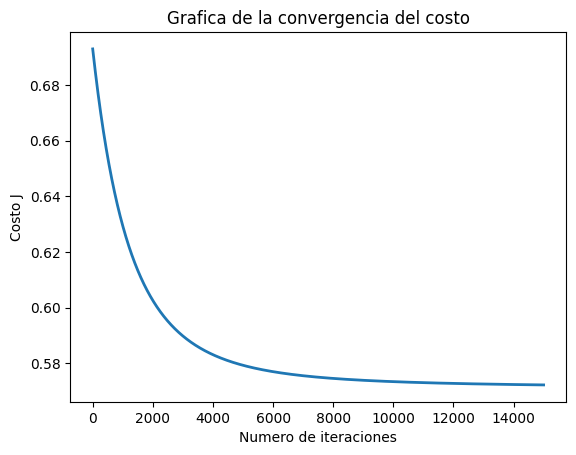

In [49]:
pyplot.plot(np.arange(len(J_historico_CR)), J_historico_CR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [50]:
X_array_CR = [1,58,1,159,53,110,70,1,1,0,0,1]
X_array_copy_CR = X_array_CR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_CR[1:] = (X_array_CR[1:] - mu_CR) / sigma_CR

resultados_CR = sigmoid(np.dot(X_array_CR, theta_CR)) 

print(f"Una persona con las caracteristicas: {X_array_copy_CR} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados_CR * 100} %')

print(f"Con valores de theta: { theta_CR }")

Una persona con las caracteristicas: [1, 58, 1, 159, 53, 110, 70, 1, 1, 0, 0, 1] 
Tiene una probabilidad de tener diabetes de: 24.62338817330889 %
Con valores de theta: [ 0.00106062  0.31233019 -0.01316359 -0.03116787  0.16130323  0.62480559
  0.29086541  0.27934833 -0.01323984 -0.03752908 -0.03814166 -0.08010965]


#### 1.1.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

##### 1.1.5.1 Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [51]:
nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE', 'CARDIO_DISEASE(Si/No)']

matriz_datos_CR = np.array([
[50,2,168,62,110,80,1,1,0,0,1],
[62,1,165,68,150,80,2,1,0,0,0],
[58,1,153,78,140,90,2,1,0,0,1],
[46,1,169,64,120,80,3,1,0,0,1],
[46,1,158,58,110,80,1,1,0,0,1],
[60,2,170,69,120,80,1,1,1,1,1],
[52,2,171,98,110,90,1,1,0,0,1],
[52,1,153,63,110,70,2,1,0,0,1],
[59,2,165,65,120,80,1,1,0,0,1],
[64,1,148,50,120,80,2,1,0,0,1],
[54,2,169,55,120,80,1,1,1,0,1],
])

para_tabla = matriz_datos_CR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_CR = []

matriz_datos_CR = (matriz_datos_CR- mu_CR) / sigma_CR
matriz_datos_CR = np.concatenate([np.ones((len(matriz_datos_CR), 1)), matriz_datos_CR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_CR:
    y_pre_CR.append(sigmoid(np.dot(j, theta_CR)))

# Convertimos la lista a un array unidimensional

y_pre_CR = np.array(y_pre_CR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_CR = (y_pre_CR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_CR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_CR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|   AGE |   GENDER |   HEIGHT |   WEIGHT |   AP_HIGH |   AP_LOW |   CHOLESTEROL |   GLUCOSE |   SMOKE |   ALCOHOL |   PHYSICAL_ACTIVITY |   CARDIO_DISEASE |   CARDIO_DISEASE(Si/No) |
+=======+==========+==========+==========+===========+==========+===============+===========+=========+===========+=====================+==================+=========================+
|    50 |        2 |      168 |       62 |       110 |       80 |             1 |         1 |       0 |         0 |                   1 |         0.241085 |                       0 |
+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|    62 |        1 |      165 |       68 |       150 |       80 |             2 |    

#### 1.1.6 Validaciones
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

##### 1.1.6.1 Normalizamos el X_test que es el 20% separado a un incio:

In [52]:
X_norm_test_CR = (X_testCR- mu_CR) / sigma_CR
m_test= len(X_testCR)

##### 1.1.6.2 Concadenamos unos a matriz X normalizado del test:

In [53]:
X_test_ready_CR = np.concatenate([np.ones((m_test_CR, 1)), X_norm_test_CR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3], 
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5], 
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7], 
    X_test_ready_CR[i, 8], 
    X_test_ready_CR[i, 9], 
    X_test_ready_CR[i, 10], 
    X_test_ready_CR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.495    -0.730     0.445  -0.076   1.401   0.896  -0.538  -0.396    -0.310  -0.238  -2.014
   1.000   1.281     1.370    -0.534   0.902  -0.991  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.643    -0.730    -1.146   1.671  -0.393  -0.143  

##### 1.1.6.3 Hacemos el calculo de Y predicha 

In [54]:
y_predicha_CR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_CR:
    y_predicha_CR.append(sigmoid(np.dot(dato, theta_CR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_CR = np.array(y_predicha_CR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_CR = (y_predicha_CR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1], 
    X_test_ready_CR[i, 2], 
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4], 
    X_test_ready_CR[i, 5], 
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7], 
    X_test_ready_CR[i, 8], 
    X_test_ready_CR[i, 9], 
    X_test_ready_CR[i, 10],
    X_test_ready_CR[i, 11], 
    y_predicha_CR[i], 
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497           0.20              0
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.43              0
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.44              0
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497           0.88              1
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497           0.66              1
   1.000  -0.495    -0.730     0.445  -0.076   1.401 

##### 1.1.6.4 Calculando la precision del entrenamiento:
se hace uso del **np.mean**, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en **y_predicha** e **y_test**.

In [55]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_CR == y_testCR) * 100))

Precisión de entrenamiento: 72.89380 %


## 2. Usando sin regularizacion

En este paso se aplicara los mismos pasos, solo que no se aplicara la regularizacion  para evitar el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.


### 2.1 Regresion Logistica

Carga de los datos para la regresion logistica:

In [56]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testSR = X_test.copy()
y_testSR = y_test.copy()
m_test_SR = len(y_testSR)

#estos datos seran usados para el test
X_trainSR = X_train.copy()
y_trainSR = y_train.copy()
m_train_SR = len(y_trainSR)

#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_trainSR[i, 0], 
        X_trainSR[i, 1],
        X_trainSR[i, 2],
        X_trainSR[i, 3], 
        X_trainSR[i, 4], 
        X_trainSR[i, 5],
        X_trainSR[i, 6], 
        X_trainSR[i, 7], 
        X_trainSR[i, 8], 
        X_trainSR[i, 9], 
        X_trainSR[i, 10], 
        y_trainSR[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      50       1       173        72     120      70       1       1       0         0       1           1
      62       2       174        52     120      80       1       1       1         0       1           1
      46       2       156        62     115      70       1       1       0         0       1           0
      58       1       158        90     140      90       1       1       0         0       1           1
      62       1       156        90     160      80       3       3       0         0       1           0
      60       1       151        44     120      80       1       2       0         0       1           0
      40       1       156        56     120      70       1       1       0         0       1           0
      45       1       157        

#### 2.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` para normalizar todos los valores de nuestra matriz X:

In [57]:
X_norm_SR, mu_SR, sigma_SR= featureNormalize(X_trainSR)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm_SR[i, 0], 
        X_norm_SR[i, 1],
        X_norm_SR[i, 2], 
        X_norm_SR[i, 3], 
        X_norm_SR[i, 4], 
        X_norm_SR[i, 5],
        X_norm_SR[i, 6],
        X_norm_SR[i, 7], 
        X_norm_SR[i, 8], 
        X_norm_SR[i, 9], 
        X_norm_SR[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.495  -0.730     1.058    -0.146  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   1.281   1.370     1.180    -1.543  -0.393  -0.143  -0.538  -0.396   3.226    -0.238   0.497
  -1.087   1.370    -1.024    -0.844  -0.692  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   0.689  -0.730    -0.779     1.112   0.803   0.896  -0.538  -0.396  -0.310    -0.238   0.497
   1.281  -0.730    -1.024     1.112   1.999  -0.143   2.401   3.085  -0.310    -0.238   0.497
   0.985  -0.730    -1.636    -2.102  -0.393  -0.143  -0.538   1.345  -0.310    -0.238   0.497
  -1.974  -0.730    -1.024    -1.263  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
  -1.235  -0.730    -0.901    -2.172  -0.393  -0.143  -0.538  -0.396  -0.310    -0.238   0.497
   0.393  -0.730     0.323     0.

#### 2.1.2 Agregamos la columna de unos a nuestra matriz

Agregamos nuestro sesgo de columna de unos a nuestra matriz de X:

In [58]:
X_ready_SR = np.concatenate([np.ones((m_train_SR, 1)), X_norm_SR], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready_SR[i, 0],
        X_ready_SR[i, 1], 
        X_ready_SR[i, 2], 
        X_ready_SR[i, 3],
        X_ready_SR[i, 4], 
        X_ready_SR[i, 5], 
        X_ready_SR[i, 6], 
        X_ready_SR[i, 7], 
        X_ready_SR[i, 8], 
        X_ready_SR[i, 9], 
        X_ready_SR[i, 10], 
        X_ready_SR[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.495    -0.730     1.058  -0.146  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281     1.370     1.180  -1.543  -0.393  -0.143  -0.538  -0.396     3.226  -0.238   0.497
   1.000  -1.087     1.370    -1.024  -0.844  -0.692  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.689    -0.730    -0.779   1.112   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281    -0.730    -1.024   1.112   1.999  -0.143   2.401   3.085    -0.310  -0.238   0.497
   1.000   0.985    -0.730    -1.636  -2.102  -0.393  -0.143  -0.538   1.345    -0.310  -0.238   0.497
   1.000  -1.974    -0.730    -1.024  -1.263  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -1.235    -0.730    -0.901  -2.1

##### 2.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente pero esta ves sin introducir el parametro `lambda`:

In [59]:
#creamos un theta con 19 columnas de ceros
theta_SR = np.zeros(len(X_ready_SR[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite_SR = 15000
alpha_SR = 0.0009

theta_SR, J_historico_SR = descensoGradienteSR(theta_SR, X_ready_SR, y_trainSR, alpha_SR, num_ite_SR)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht_SR in theta_SR:
    i += 1
    print(f"theta {i}: {tht_SR}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_SR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: 0.0041007900367013616
theta 2: 0.33329366842114116
theta 3: -0.01440155045181225
theta 4: -0.03335108664096205
theta 5: 0.16883752264354393
theta 6: 0.6747839473121756
theta 7: 0.3028748861970188
theta 8: 0.2986999295322526
theta 9: -0.02134335165248756
theta 10: -0.040318407936396045
theta 11: -0.04193558900750641
theta 12: -0.08690754869341903
########################################################################################################
con un costo de: 0.5647883697613265 


#### 2.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

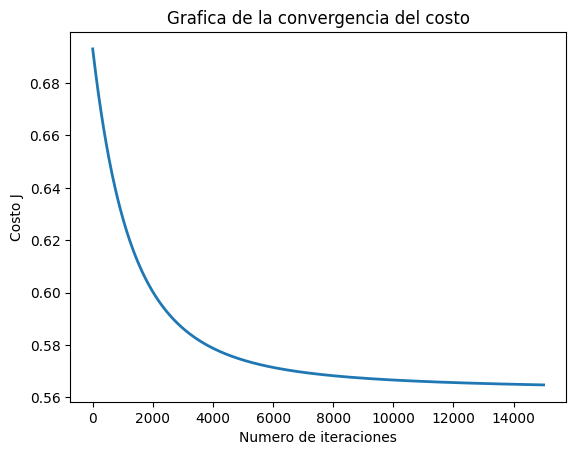

In [60]:
pyplot.plot(np.arange(len(J_historico_SR)), J_historico_SR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [61]:
X_array_SR = [1,58,1,159,53,110,70,1,1,0,0,1]
X_array_copy_SR = X_array_SR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_SR[1:] = (X_array_SR[1:] - mu_SR) / sigma_SR

resultados_SR = sigmoid(np.dot(X_array_SR, theta_SR)) 

print(f"Una persona con las caracteristicas: {X_array_copy_SR} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados_SR * 100} %')

print(f"Con valores de theta: { theta_SR }")

Una persona con las caracteristicas: [1, 58, 1, 159, 53, 110, 70, 1, 1, 0, 0, 1] 
Tiene una probabilidad de tener diabetes de: 23.457839572489682 %
Con valores de theta: [ 0.00410079  0.33329367 -0.01440155 -0.03335109  0.16883752  0.67478395
  0.30287489  0.29869993 -0.02134335 -0.04031841 -0.04193559 -0.08690755]


##### 2.1.5.1 Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [62]:
nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE', 'CARDIO_DISEASE(Si/No)']

matriz_datos_SR = np.array([
[50,2,168,62,110,80,1,1,0,0,1],
[62,1,165,68,150,80,2,1,0,0,0],
[58,1,153,78,140,90,2,1,0,0,1],
[46,1,169,64,120,80,3,1,0,0,1],
[46,1,158,58,110,80,1,1,0,0,1],
[60,2,170,69,120,80,1,1,1,1,1],
[52,2,171,98,110,90,1,1,0,0,1],
[52,1,153,63,110,70,2,1,0,0,1],
[59,2,165,65,120,80,1,1,0,0,1],
[64,1,148,50,120,80,2,1,0,0,1],
[54,2,169,55,120,80,1,1,1,0,1],
])

para_tabla = matriz_datos_SR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_SR = []

matriz_datos_SR = (matriz_datos_SR- mu_SR) / sigma_SR
matriz_datos_SR = np.concatenate([np.ones((len(matriz_datos_SR), 1)), matriz_datos_SR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_SR:
    y_pre_SR.append(sigmoid(np.dot(j, theta_SR)))

# Convertimos la lista a un array unidimensional

y_pre_SR = np.array(y_pre_SR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_SR = (y_pre_SR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_SR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_SR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|   AGE |   GENDER |   HEIGHT |   WEIGHT |   AP_HIGH |   AP_LOW |   CHOLESTEROL |   GLUCOSE |   SMOKE |   ALCOHOL |   PHYSICAL_ACTIVITY |   CARDIO_DISEASE |   CARDIO_DISEASE(Si/No) |
+=======+==========+==========+==========+===========+==========+===============+===========+=========+===========+=====================+==================+=========================+
|    50 |        2 |      168 |       62 |       110 |       80 |             1 |         1 |       0 |         0 |                   1 |         0.227378 |                       0 |
+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|    62 |        1 |      165 |       68 |       150 |       80 |             2 |    

#### 2.1.6 Validaciones
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

##### 2.1.6.1 Normalizamos el X_test que es el 20% separado a un incio:

In [63]:
X_norm_test_SR = (X_testSR- mu_SR) / sigma_SR

##### 2.1.6.2 Concadenamos unos a matriz X normalizado del test:

In [64]:
X_test_ready_SR = np.concatenate([np.ones((m_test_SR, 1)), X_norm_test_SR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3], 
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5], 
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7], 
    X_test_ready_SR[i, 8], 
    X_test_ready_SR[i, 9], 
    X_test_ready_SR[i, 10], 
    X_test_ready_SR[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.495    -0.730     0.445  -0.076   1.401   0.896  -0.538  -0.396    -0.310  -0.238  -2.014
   1.000   1.281     1.370    -0.534   0.902  -0.991  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.643    -0.730    -1.146   1.671  -0.393  -0.143  

##### 2.1.6.3 Hacemos el calculo de Y predicha 

In [65]:
y_predicha_SR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_SR:
    y_predicha_SR.append(sigmoid(np.dot(dato, theta_SR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_SR = np.array(y_predicha_SR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_SR = (y_predicha_SR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1], 
    X_test_ready_SR[i, 2], 
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4], 
    X_test_ready_SR[i, 5], 
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7], 
    X_test_ready_SR[i, 8], 
    X_test_ready_SR[i, 9], 
    X_test_ready_SR[i, 10],
    X_test_ready_SR[i, 11], 
    y_predicha_CR[i], 
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497           0.20              0
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.43              0
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.44              0
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497           0.88              1
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497           0.66              1
   1.000  -0.495    -0.730     0.445  -0.076   1.401 

##### 1.1.6.4 Calculando la precision del entrenamiento:
se hace uso del **np.mean**, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en **y_predicha** e **y_test**.

In [66]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_SR == y_testSR) * 100))

Precisión de entrenamiento: 72.82838 %


## Conclusiones

En esta parte se presentaran las conclusiones de acuerdo a las experiencias vistas en este laboratorio aplicando regularizacion y sin aplicar regularizacion.

### ¿Cual es el mejor?
Se comparó el desempeño del modelo de regresion logistica ya sea en el calculo del costo o tiempo de entrenamiento del modelo, incluso hasya el calculo de la presiocion del modelo, se pueden extraer varias conclusiones significativas

##### 1. Impacto de la regularización en la precisión del modelo:

 Se observa que la regularización puede tener un efecto en la precisión del modelo. En algunos casos, la regularización puede mejorar la precisión del modelo al reducir el sobreajuste (overfitting),
 especialmente cuando se tienen conjuntos de datos pequeños o altamente ruidosos. 
 
 Sin embargo, en conjuntos de datos más grandes o con menos ruido, la regularización puede no proporcionar mejoras significativas en la precisión y podría incluso degradarla.

 Para este caso se hizo la comparacion entre la preciscion de ambos modelos, con y sin regularizacion:

| Modelo  | Precision del modelo con regularizacion| Presicion del modelo sin regularizacion| Dieferencia entre ambos|
|---------|------|---------|-----------|
| Regresion Logistica | 72.89380 %  | 72.82838 % | 0.06542 % |

Se puede notar que la diferencia entre ambos es poca, pero se puede notar que la precision del modelo con regularizar es un poco mas alta que su contraparte, pero esto nos da una idea que que al aplicar regularizacion la presicion llega a aumentar.

##### 2. Calculo del costo

Al agregar un término de penalización a la función de costo, la regularización restringe los coeficientes del modelo, lo que evita que se vuelvan demasiado grandes y sensibles a pequeñas variaciones en los datos de entrenamiento y de acuerdo a esto se hizo una comparacion de los costos obtenidos para amobos modelos:

| Modelo  | Costo calculado del modelo con regularizacion | Costo calculado del modelo sin regularizacion |Diferencia entre ambos|
|---------|------|---------|-----------|
| Regresion Logistica| 0.572162951901662 | 0.5647883697613265 | 0.007374582140335499 |

Como se puede observar, la diferencia entre los costos es muy pequeña. El costo del modelo aplicado sin regularización es menor que el del modelo aplicado con regularización. Esto se debe a que al aplicar regularización se incrementó el hiperparámetro lambda, lo que elevó el valor del costo.

##### 3. Tiempo de entrenamiento

En algunos casos, la regularización puede aumentar el tiempo de entrenamiento del modelo debido a la necesidad de calcular los términos adicionales de penalización en la función de costo y actualizar los coeficientes del modelo de manera iterativa.

Haciendo una tabla para ver los cambios en el tiempo de entranamiento de entrenamiento:

| Modelo  | Tiempo de entrenamiento del modelo con regularizacion | Tiempo de entrenamiento del modelo sin regularizacion |Dieferencia entre ambos|
|---------|------|---------|-----------|
| Regresion Logistica | 31.4 seg   | 30.1 seg  | 1.3 seg |

Como se puede observar el tiempo de entrenamiento para el modelo usando regularizacion es con pocos segundos mayor con respecto al usado sin regularizacion. Puede que la diferencia no sea mucha, e incluso aveces no se podria notar, pero aun asi se nota una diferencia cuando se aplica el hiperparametro lambda para la fase de entrenamiento.

#### ¿Entonces cual es el mejor?

Una vez hecha las comparaciones del desempeño de modelos de con regularizacion y sin regularización en las partes de costo, tiempo de entrenamiento y precision de ambos modelos, se puede determino que el mejor modelo es aquel que se aplica regularizacion.

**¿Porque?**

Porque respecto al costo y el tiempo de entrenamiento aunque estos tenga una diferencia casi insignificante, la caracteristica que mas se tomo en cuenta la precision del modelo, ya que aunque la diferencia entre estos es muy minima, mientras el modelo este mas cercano al 100% de su precision es mucho mejor, porque si tenemos un modelo con mas ejemplos puede que la precision de este mejore considerablemente al aplicar regularizacion, y la diferencia entre estos ya no sea una cercana a cero.

### ¿Cuales son los mejores hiperparametros?

Se eligio aquellos hiperparametros de acuerdo a la grafica de costo realizada para cada modelo, guiandonos en que la grafica de costo no este muy curveada pero tampoco que este demasiado recta. A continuacion se muestra los hiperparametros seleccionados:

- **Numero de iteraciones.-** se eligio como una cantidad de **15000** iteraciones, esto para evitar el sobreajuste en la grafica de costo, guiandonos que la grafica de costo no se curvee a un numero mayor de iteraciones a 15000 o llegue a formar una recta cuanto este era demasiado menor a 15000 numero de iteraciones.

- **alpha.-** Para este hiperparametro se selecciono un valor de **0.0009** para ambos modelos, esto porque se queria buscar una precision muy cercana al valor que se deseaba predecir, ya que a menor valor de alpha, se llega a tener mayor precision del modelo, pero esto lleva a un mayor consumo de recursos al equipo de computo, ya que a menor valor de alpha el tiempo de entrenamiento era mucho mas alto y el equipo de computo llegaba a tener sobrecalentarse.

- **Lambda.-** Para el hiperparametro **lambda** se uso el valor de **1000**, igualmente se siguio las recomendaciones que el hiperparametro lambda podria estar entre 10, 100 o 1000, se hizo la prueba con cada uno pero el que mejor resultados pero con mayor tiempo de entrenamiento y procesamiento nos dio fue el valor de un lamdda de *1000*, pero se hizo la prueba con un valor de lambda cercano a cero, y nos genero un costo muy cercano al costo del modelo sin regularizar, mientras que si usabamos un valor lambda negativo nos generaba una grafica contraria al de la curva esperada.

### ¿Cual asumirias en una determinada circunstancia?

El modelo aplicado con regularizacion seria mejor aplicado en un circunstancia en donde usemos un numero de iteraciones demasiado alto, en este caso 15000, esto para evitar el overfiting, pero sin olvidar que se requeriria un equipo de computo con buenas caracteristicas para que no haya problemas en la fase de entrenamiento. O tambien un caso donde tengamos una cantidad alta de ejemplos e igualmente vayamos a usar un numero de iteraciones demasiado alto.

El modelo aplicado sin regularizacion seria mejor aplicado a una circunstancia en donde se tenga pocos parametros, ya que modelos más complejos, como aquellos con una gran cantidad de características o parámetros, tienden a ser más propensos al overfiting.